In [31]:
## Importing necessary libraries

# For scientific computation and processing array elements.
import numpy as np
from scipy.stats import norm

# Importing pandas
import pandas as pd

# For plotting statstical visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# For pretty-printing tabular data
from tabulate import tabulate

# For plotting feature importance
from sklearn.feature_selection import mutual_info_classif

# For handling class imbalance
from imblearn.over_sampling import SMOTE

# For Split dataset into train and test
from sklearn.model_selection import train_test_split

# For Cross-Validation and Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

# For Scaliing dataset
from sklearn.preprocessing import MinMaxScaler

# Importing algorithams for building model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# For plotting Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

# For building Artificial Neural Networks
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# For model explainability
import shap

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name '_check_X' from 'imblearn.utils._validation' (/Users/baoquynh/anaconda3/lib/python3.11/site-packages/imblearn/utils/_validation.py)

In [26]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
  Obtaining dependency information for imblearn from https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 3.4 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [3]:
df=pd.read_csv("bank-full.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
null_variables=['poutcome','contact','education','job']
# Checking categories in each target feature
for var in null_variables:
    print(df[var].value_counts())
    print('--'*45)

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64
------------------------------------------------------------------------------------------
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
------------------------------------------------------------------------------------------
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
------------------------------------------------------------------------------------------
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
------------------------------------------------------------------------------------------


In [6]:
df.drop(columns='poutcome', inplace=True)

# Replacing null values with the most frequent value in a variable
df['contact']=df['contact'].fillna(df['contact'].mode()[0])
df['education']=df['education'].fillna(df['education'].mode()[0])
df['job']=df['job'].fillna(df['job'].mode()[0])

In [7]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
y            0
dtype: int64

In [8]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features but remove flat IQR feature pdays and previous
outlier_var=['age', 'balance', 'duration', 'campaign']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1
    
    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR
    
    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

In [9]:
# Defining r to autofit the number and size of plots
r = int(len(df.columns))

In [10]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

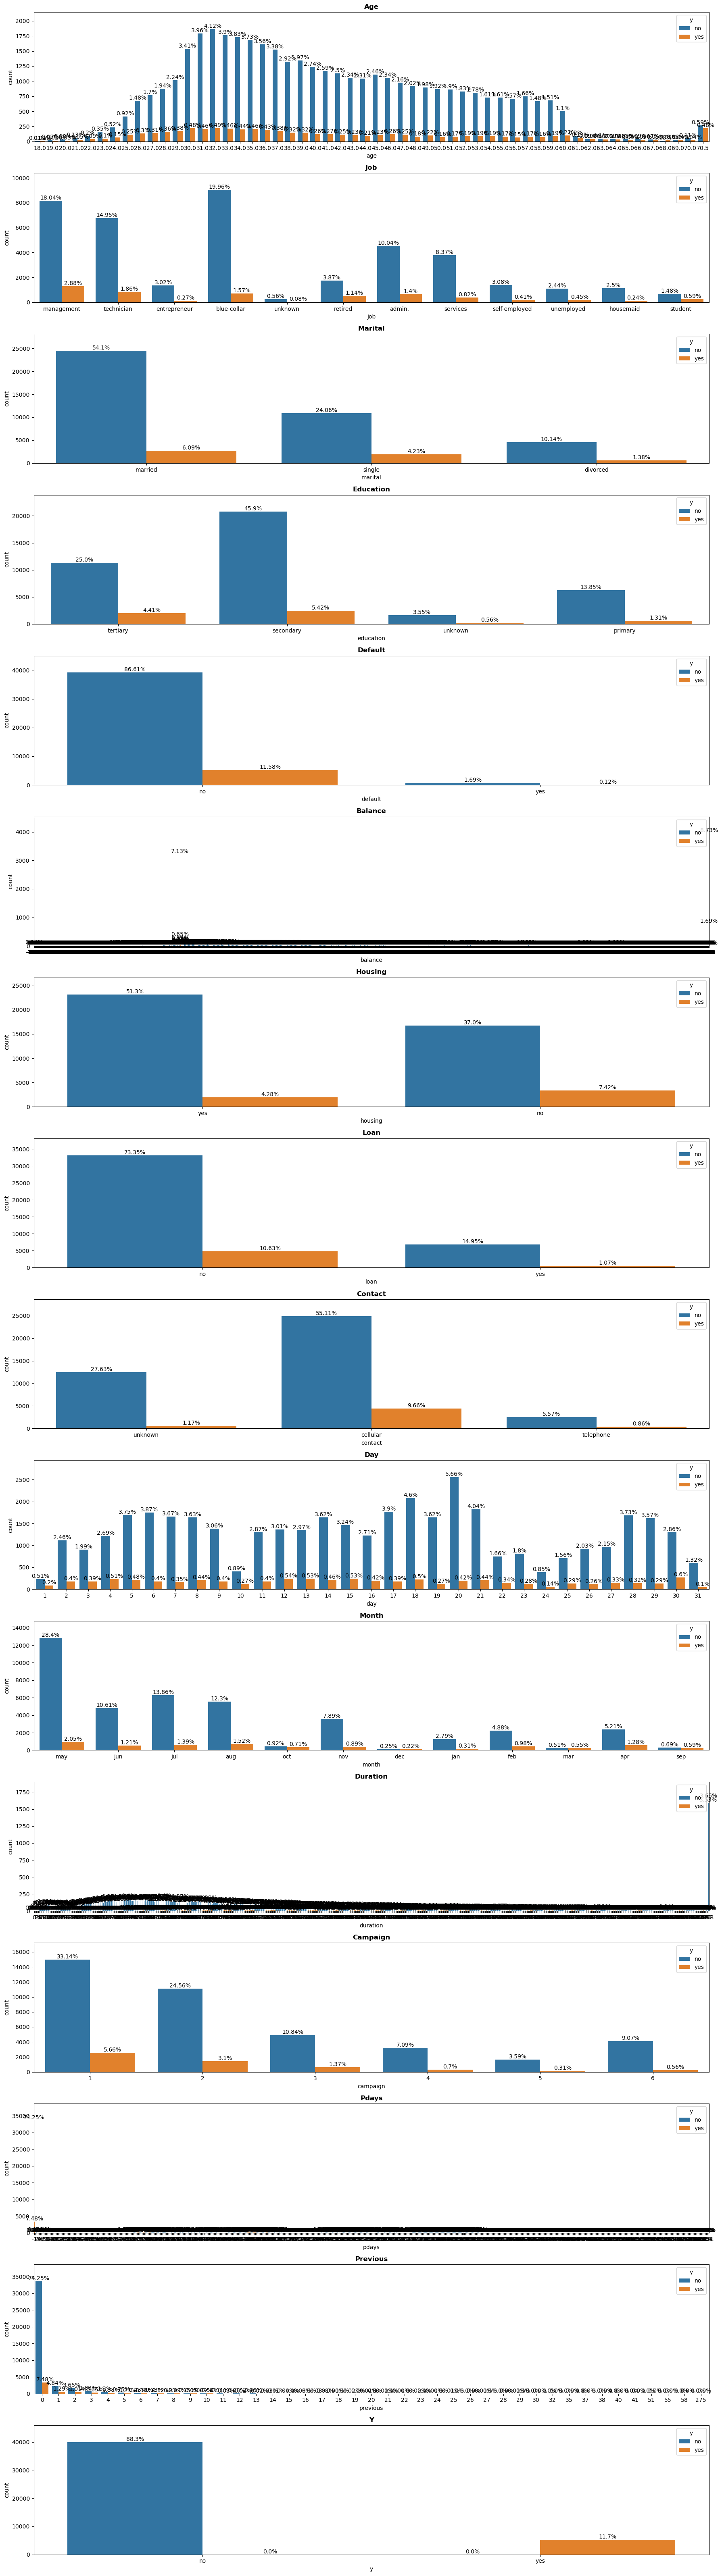

In [11]:
# Plotting the countplots for each variable in target_variables
plt.figure(figsize=(18,r*4))
for n,var in enumerate(df.columns):
    plot = plt.subplot(r,1,n+1)
    sns.countplot(x=df[var], hue=df['y']).margins(y=0.15)
    plt.title(f'{var.title()}',weight='bold')
    plt.tight_layout()
    annot_percent(plot)

<Axes: title={'center': 'Number of clients who subscribed bank term deposit as per their job and education'}, xlabel='job,education,y'>

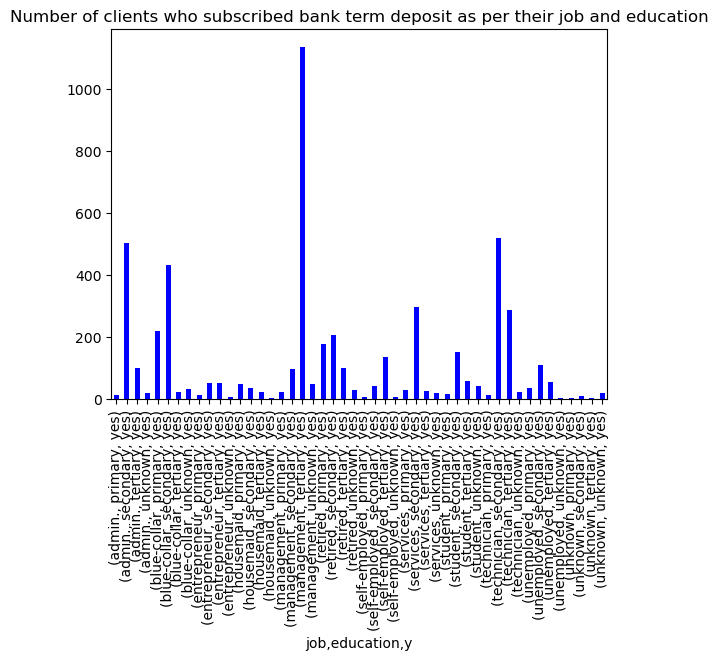

In [12]:
# Plotting a count plot to vizualize the number of customers according to their jobs and lvel of education by using group by operation

# Dataset having only subscribed Bank term deposit with job and education
subscribed_df = df[df.y=='yes']
subscribed_df2=subscribed_df.groupby(['job','education','y'])['y'].count()

# Plotting bar plot for subscribed Bank term deposit with job and education
subscribed_df2.plot(kind="bar",title = 'Number of clients who subscribed bank term deposit as per their job and education', color="blue")

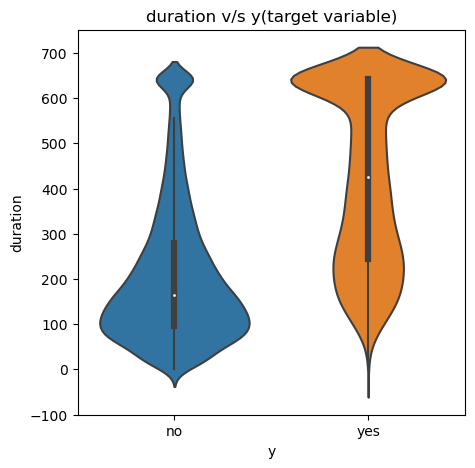

In [13]:
# Plotting box plot for checking the spread of duration in seconds for the target variable(yes or no)
plt.figure(figsize=(5,5))
plot=plt.subplot(111)
ax=sns.violinplot(x=df['y'], y=df['duration'])
ax.set_title('duration v/s y(target variable)')
annot_percent(plot)
plt.show()

<Axes: title={'center': 'Number of clients who subscribed bank term deposit as per their housing loan and personal loan'}, ylabel='loan,housing'>

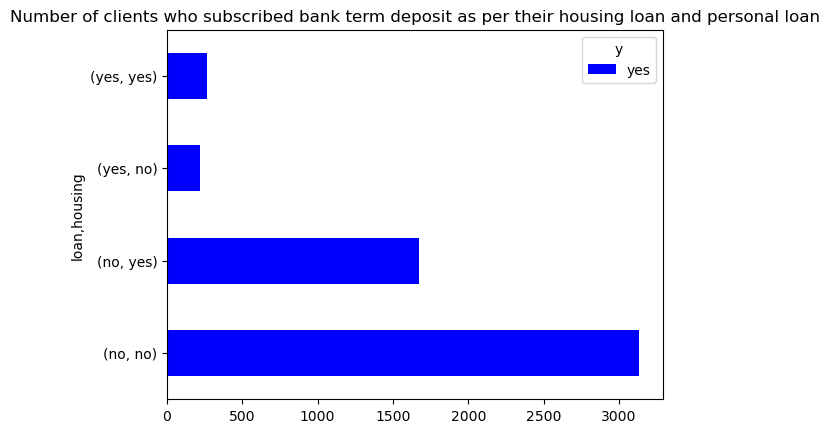

In [14]:
# Plotting bar graph to vizualize the count of clients who have opted for a term deposit given their housing loan and personal loan

# Dataset having only subscribed Bank term deposit with housing loan and personal loan
df_loan_yes = df[df.y=='yes']
df_loan_yes2=df_loan_yes.groupby(['loan','housing','y'])['y'].count().unstack()

# Plotting bar plot for subscribed Bank term deposit with housing loan and personal loan
df_loan_yes2.plot(kind="barh",title = 'Number of clients who subscribed bank term deposit as per their housing loan and personal loan', color="blue")

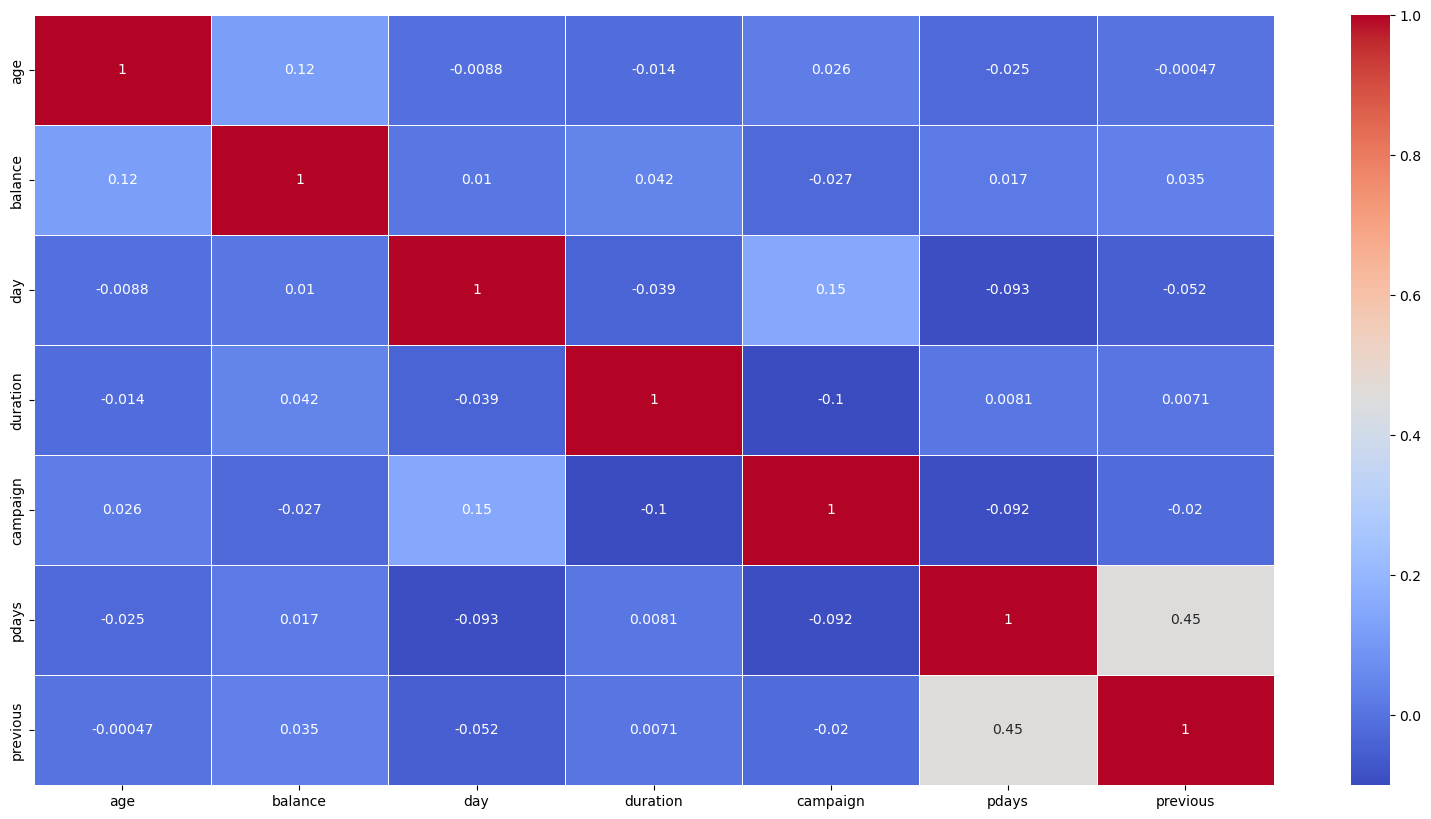

In [30]:
# Examining the heatmap and correlation matrix to determine the relationship between the variables
selected_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
selected_df = df[selected_columns]

f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(selected_df.corr(), ax=ax, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

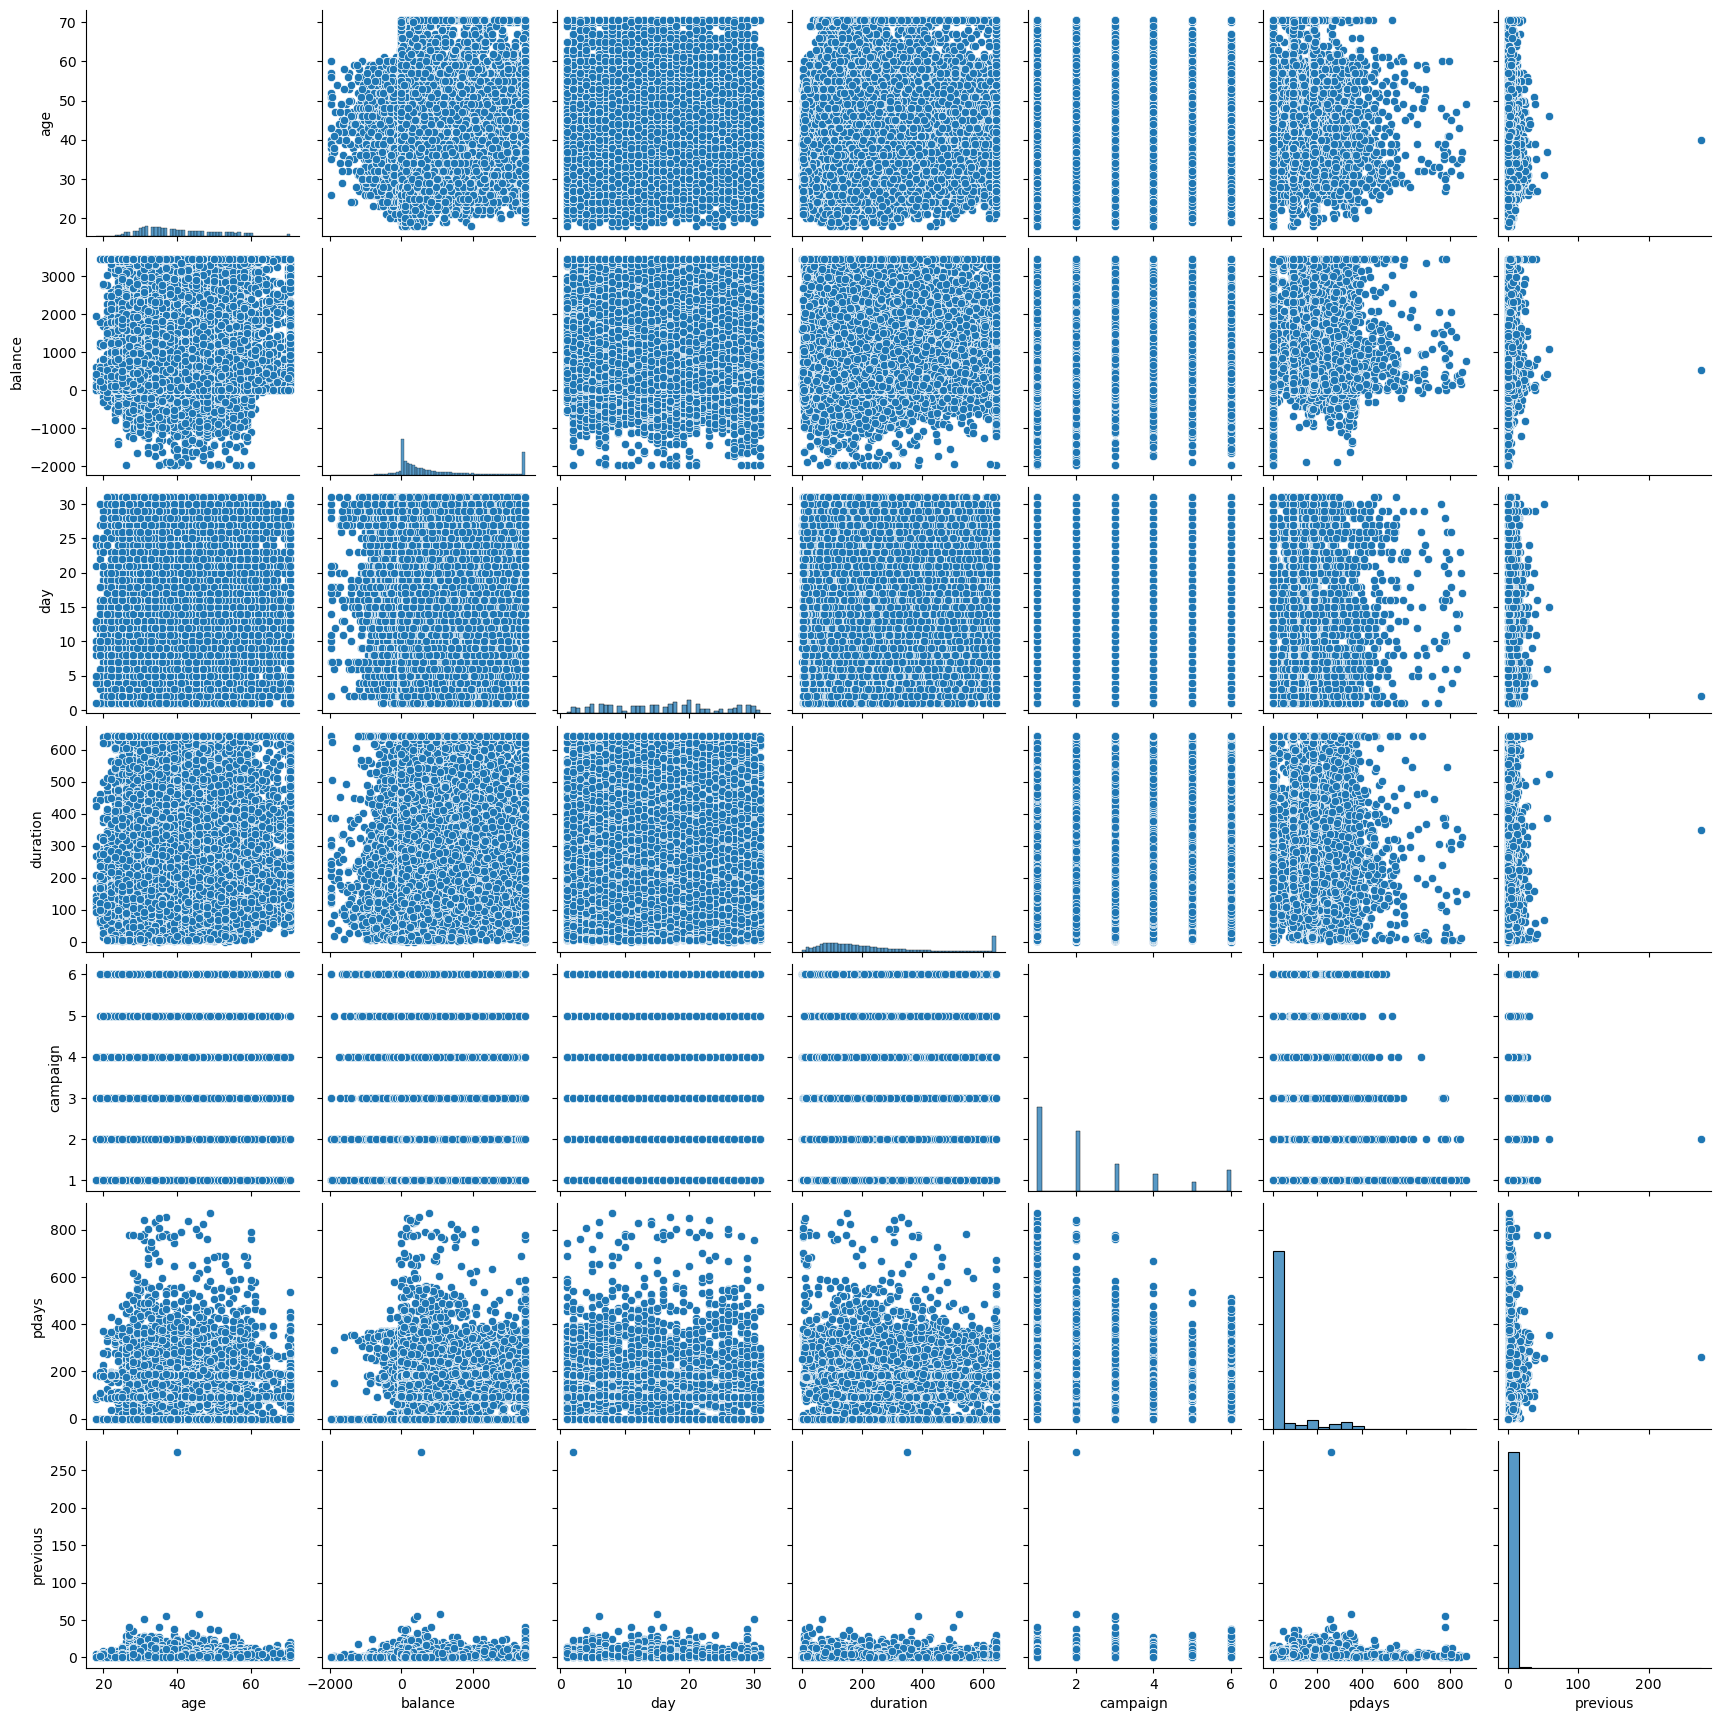

In [19]:
sns.pairplot(df, palette="husl")
plt.show()